<a href="https://colab.research.google.com/github/Maks3174/Phy/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [4]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [6]:
mean_order_quantity = sales['Order_Quantity'].mean()
median_order_quantity = sales['Order_Quantity'].median()
print("Середнє значення order_quantity:", mean_order_quantity)
print("Медіана order_quantity:", median_order_quantity)

Q1 = sales['Order_Quantity'].quantile(0.25)
Q3 = sales['Order_Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = sales[(sales['Order_Quantity'] < lower_bound) | (sales['Order_Quantity'] > upper_bound)]
print("Кількість викидів:", len(outliers))

Середнє значення order_quantity: 11.901659648253654
Медіана order_quantity: 10.0
Кількість викидів: 0


# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

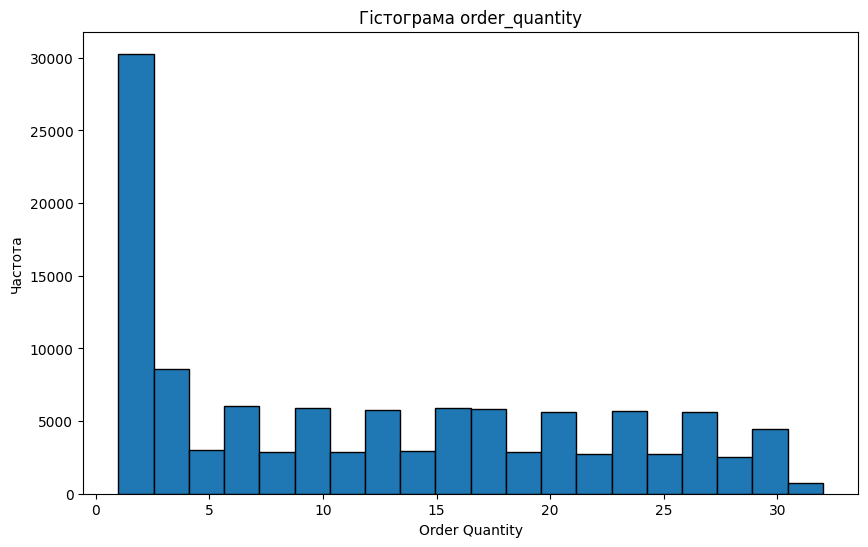

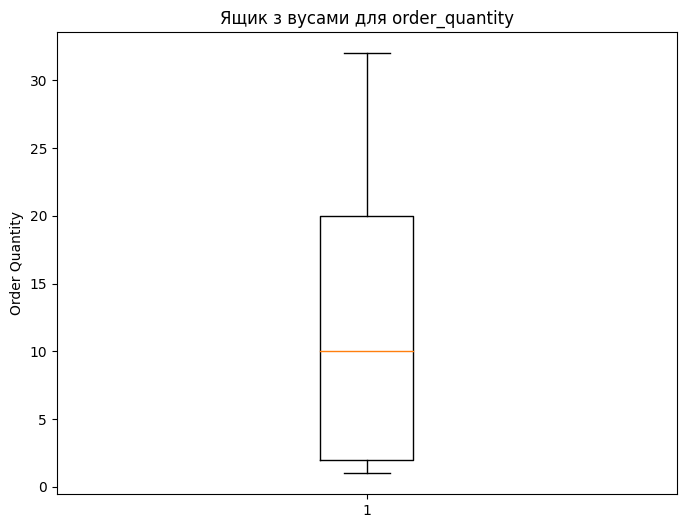

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(sales['Order_Quantity'], bins=20, edgecolor='black')
plt.title('Гістограма order_quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(sales['Order_Quantity'])
plt.title('Ящик з вусами для order_quantity')
plt.ylabel('Order Quantity')
plt.show()

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Обчислюємо медіану `median`
3. Очислюємо значення `IQR = q3 - q1`
4. Обчислюємо `lower = q1 - 1.5*IQR`
5. Обчислюємо `upper = q3 + 1.5*IQR`
6. Викидами вважаємо значення які `< lower` або `>upper`

In [9]:
Q1 = sales['Order_Quantity'].quantile(0.25)
Q3 = sales['Order_Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sales_cleaned = sales[(sales['Order_Quantity'] >= lower_bound) & (sales['Order_Quantity'] <= upper_bound)]
print("Розмір даних після видалення викидів:", len(sales_cleaned))

Розмір даних після видалення викидів: 113036


# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

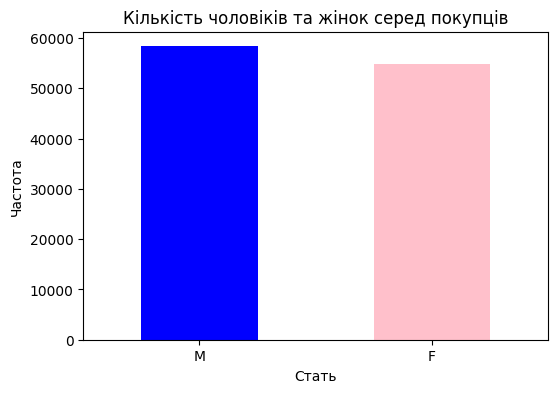

In [10]:
gender_counts = sales['Customer_Gender'].value_counts()

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Кількість чоловіків та жінок серед покупців')
plt.xlabel('Стать')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

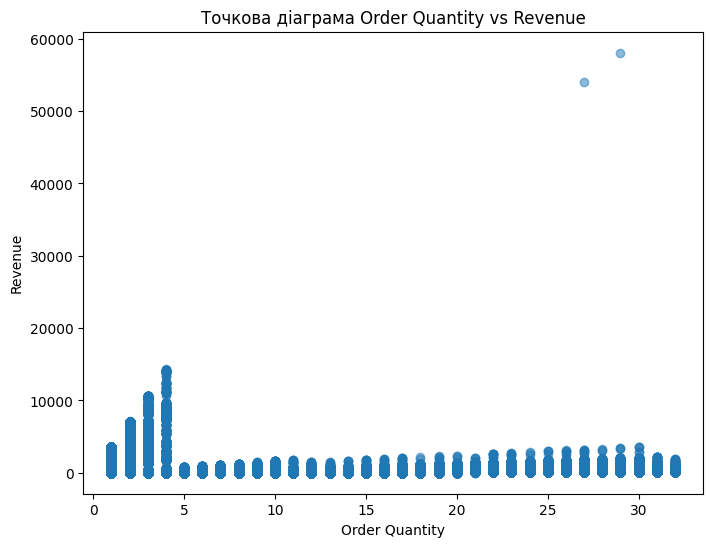

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(sales['Order_Quantity'], sales['Revenue'], alpha=0.5)
plt.title('Точкова діаграма Order Quantity vs Revenue')
plt.xlabel('Order Quantity')
plt.ylabel('Revenue')
plt.show()

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`

In [12]:
avg_profit_by_category = sales.groupby('Product_Category')['Profit'].mean()
print("Середній profit за категоріями товарів:")
print(avg_profit_by_category)

Середній profit за категоріями товарів:
Product_Category
Accessories    126.388719
Bikes          789.749673
Clothing       167.677276
Name: Profit, dtype: float64
